In [1]:
import os
import glob
import math
import time
from joblib import Parallel, delayed
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import KFold
import lightgbm as lgb
import warnings
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import random
import seaborn as sns; sns.set_theme()
import torch.nn.functional as F
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import pylab as pl
from matplotlib.pyplot import figure
from IPython import display
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import umap
from sklearn import svm
from lightgbm import LGBMClassifier
from numpy import std
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import cm
from sklearn.metrics import confusion_matrix

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 300)

Load train and test data

# 1. Load data and preprocessing

## 1.1 Load train and test data

In [3]:
train = pd.read_csv('./MLR_Project_train.csv')
test = pd.read_csv('./MLR_Project_test.csv')

Show the data format and dimension

In [4]:
train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,TARGET
0,0,5874.524387,1072.671848,41440.76212,41440.23732,70.405148,7.392780,70.377281,23229.69262,23229.72655,70.378864,7.389173,70.380160,23229.76782,23379.81637,83.418623,11.615135,83.418623,23466.72590,23466.7259,83.418623,7.425618,70.494241,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,4898.757333,15165.92759,297487.1654,297487.16540,15165.92759,4898.757333,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,64.192982,20.940618,76.070270,23376.73707,23343.13291,77.290965,347.308164,102.380501,24823.08137,24120.94894,332.757607,17.386711,129.622187,23936.99077,21670.19233,71.518948,11.399004,78.006816,26437.161240,23811.09670,141.997532,22.474794,0.013314
1,1,6124.154099,1072.802927,41440.76212,41442.22458,70.456758,7.356050,70.379576,23229.76020,23230.10472,70.273618,7.389813,70.329906,23229.46908,23384.98219,83.418623,11.615135,83.418623,23466.72590,23466.7259,83.418623,7.441223,70.702624,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,5100.350569,15788.07683,308790.4312,308790.43120,15788.07683,5100.350569,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,2.937218,-14.428210,75.204973,23317.46049,23309.42032,74.880368,689.670872,127.070357,36746.26762,31012.79786,-310.576721,4.532673,-47.045260,22053.23653,14626.73339,48.124991,-99.618253,-115.120518,7705.543821,22665.35143,-377.287072,-73.700375,-0.000448
2,2,5905.732593,1072.802927,41443.14358,41442.30403,70.422472,7.417794,70.376448,23229.48142,23229.61008,70.474265,7.388979,70.397301,23229.83396,23387.39168,83.418623,11.615135,83.418623,23466.72590,23466.7259,83.418623,7.440201,70.686178,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,5308.548086,16430.60795,320463.9968,320463.99680,16430.60795,5308.548086,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,141.231442,25.855392,75.184756,23248.26780,23307.91084,74.635569,634.523047,71.705965,28917.00549,24632.17456,419.071308,7.403187,118.846496,23430.24573,31251.55292,71.535567,53.482719,106.179152,37586.677270,23251.62576,261.098973,22.565621,0.000244
3,3,6029.325221,1072.802927,41440.76212,41442.25682,70.458533,7.366031,70.379221,23230.08433,23229.87971,70.288944,7.390120,70.370247,23229.81662,23390.02296,83.418623,11.615135,83.418623,23233.34325,23466.7259,83.418623,7.439191,70.692085,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,5510.265781,17053.14128,331774.2409,75710.89648,17053.14128,5510.265781,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,-1.580478,-7.499746,75.184756,23248.26836,23307.91084,74.635569,583.001082,70.384022,25642.94219,23482.26269,-249.671869,7.388974,49.809681,23193.67720,15867.01579,70.369496,-12.169114,63.930236,10052.351290,23229.64352,-10.549985,4.656636,-0.000628
4,4,6142.360146,1072.802927,41443.14358,41442.46480,70.413623,7.411287,70.376788,23229.70975,23229.82255,70.467206,7.389910,70.386986,23229.87603,23392.66710,70.572881,11.615135,83.418623,23466.72590,23466.7259,83.418623,7.438244,70.680386,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,70.376262,1152.667997,17699.01445,343508.5253,343508.52530,17699.01445,5719.546213,70.376262,23229.77107,23229.77107,70.376262,7.389056,70.376262,23229.77107,23229.77107,149.144800,26.789196,74.904988,23229.77108,23260.32245,70.506980,566.549008,120.694073,25765.82131,24618.79392,363.188022,7.389057,78.826922,23235.86490,31790.06425,120.694068,42.971377,145.572170,37109.895810,24143.94971,188.639704,31.863254,0.003811


In [5]:
test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,TARGET
0,0,16335.49448,1061.530132,41238.33840,41237.30921,70.432910,7.379175,70.376460,23229.86828,23229.78910,70.397639,7.389850,70.389234,23229.90881,25602.51370,70.835039,7.537712,70.835039,23235.72471,23235.72471,70.703960,7.467846,70.433077,23230.96180,23278.59091,70.835039,7.537712,70.441802,23238.10616,23235.72471,70.703960,7133.700113,22063.32144,422799.6647,232518.5574,11589.95489,3740.045136,1860.710635,4138543.879,422799.6647,22063.32144,137.249904,66395.12033,232518.5574,232518.5574,258.079242,30.226219,75.913405,23229.77107,23229.83301,70.376262,1473.581679,71.758838,23874.69807,23499.73762,-155.498907,7.389056,70.371005,23229.77106,12139.388420,71.758829,14.703740,84.826620,8035.667142,23254.88967,92.945298,12.071364,0.010438
1,1,13166.20458,1061.661211,41238.33840,41238.66844,70.394428,7.378583,70.391576,23229.87463,23230.21191,70.288403,7.392921,70.343310,23229.64193,25607.58558,70.572881,7.452766,70.572881,23240.48762,23240.48762,70.966118,7.469469,70.576552,23230.96180,23235.72471,70.572881,7.452766,70.572881,23280.97236,23240.48762,70.966118,3945.011279,12222.51346,244010.9410,434292.0482,22695.88002,7338.666257,139.167102,1239716.334,244010.9410,12222.51346,792.472120,227216.19080,434292.0482,434292.0482,-147.808334,-20.702534,76.035317,23313.93717,23332.97615,75.852147,1828.336140,140.129854,37438.79508,30329.40335,167.006374,16.564437,34.929416,23264.53239,39398.972520,84.750309,60.805885,155.880284,41154.557460,24005.38063,199.782364,35.714646,-0.000532
2,2,12897.58082,1061.661211,41240.71985,41238.89069,70.476942,7.400935,70.375313,23229.84429,23229.89405,70.469979,7.391477,70.407134,23230.09254,25610.09095,70.572881,7.580185,70.966118,23233.34325,23233.34325,70.572881,7.470161,70.605117,23233.34325,23280.97236,70.966118,7.580185,70.441802,23235.72471,23233.34325,70.572881,995.797053,23323.37355,445692.4097,255411.3025,12850.00699,4148.336212,3120.762743,4161436.624,445692.4097,23323.37355,233.004088,67655.17244,255411.3025,255411.3025,289.867668,32.185249,75.966899,23326.54724,23327.60253,75.649862,1924.171252,111.147939,37691.96604,29511.34868,53.482595,13.727445,165.790143,24499.54560,7180.863302,74.919427,-22.153780,54.137349,6873.937564,23667.70306,74.616186,24.773579,0.000726
3,3,12887.42863,1061.661211,41238.33840,41239.00250,70.412815,7.378490,70.377339,23229.91979,23229.86689,70.283757,7.389189,70.359007,23229.67957,25612.79171,70.572881,7.452766,70.572881,23233.34325,23240.48762,70.966118,7.469667,70.602493,23230.96180,23235.72471,70.572881,7.452766,70.572881,23280.97236,23240.48762,70.966118,4329.804019,13410.04591,265586.1421,88824.3188,23883.41247,7723.458997,1326.699554,1261291.535,265586.1421,13410.04591,1177.264861,228403.72320,455867.2494,455867.2494,-141.955445,-15.581110,75.883198,23230.50078,23310.57289,73.052689,1808.877007,123.263599,31327.33150,25876.72169,86.016065,7.327061,26.252334,22958.21980,39599.779840,122.820383,46.190366,145.600464,39883.925250,24179.10475,145.999434,26.920634,0.001459
4,4,11994.73779,1061.661211,41240.71985,41238.81077,70.481341,7.392913,70.385266,23229.57329,23229.79297,70.450114,7.390389,70.377065,23229.74335,25615.17798,70.572881,7.580185,70.966118,23233.34325,23233.34325,70.572881,7.469671,70.607659,23233.34325,23280.97236,70.966118,7.580185,70.441802,23235.72471,23233.34325,70.572881,1408.908041,24598.30068,468855.4055,278574.2983,14124.93413,4561.447200,4395.689873,4184599.619,468855.4055,24598.30068,175.464314,68930.09957,278574.2983,278574.2983,276.189378,21.701184,76.055710,23354.81165,23345.67063,77.102636,1906.984098,598.329736,40066.97972,36345.65544,-605.228200,-132.958333,-529.575904,12869.21582,6244.418503,-23.787704,-46.168214,-57.984418,-6030.026819,13649.75983,-694.862277,-218.983324,-0.001462


## 1.2 Check whether Nan exist in data

In [6]:
train_sum = train.isnull().sum().sum()
test_sum = test.isnull().sum().sum()

if train_sum == 0 and test_sum == 0:
    print('No Nan exist either in training or testing dataset')
elif train_sum != 0 and test_sum == 0:
    print('Nan exist in train dataset, no Nan exist in test dataset')
elif train_sum == 0 and test_sum != 0:
    print('No Nan exist in train dataset, Nan exist in test dataset')
else:
    print('Nan exist both in training and testing dataset')

No Nan exist either in training or testing dataset


## 1.3 Show the maximum return of train and test

In [7]:
train_max = np.sum(train['TARGET'][train['TARGET']>0])
test_max = np.sum(test['TARGET'][test['TARGET']>0])

print('Maximum return of training set:', train_max)
print('Maximum return of testing set:', test_max)

Maximum return of training set: 195.6927566509
Maximum return of testing set: 55.96225182400002


### 1.3.1 Remove the Unnamed columns in dataframe

In [8]:
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

## 1.4 Naive random selection experiment

In [9]:
train_random = 0
for j in range(10000):
    ind = np.random.randint(2, size=train.shape[0])
    train_random = train_random + sum(train['TARGET'][ind>0])

print('Result of train naive random selection:', train_random/10000)

test_random = 0
for j in range(10000):
    ind = np.random.randint(2, size=test.shape[0])
    test_random = test_random + sum(test['TARGET'][ind>0])

print('Result of test naive random selection:', test_random/10000)


Result of train naive random selection: -0.8275621056692822
Result of test naive random selection: -0.6531676759990601


In [10]:
print(f'Train naive random selection percentage return: {train_random/train_max/100}%')
print(f'Test naive random selection percentage return: {test_random/test_max/100}%')

Train naive random selection percentage return: -0.4228884705965821%
Test naive random selection percentage return: -1.167157601258179%


## 1.5 Get data shape

In [11]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (90000, 67)
Test shape: (19707, 67)


## 3.1 Remove extreme Target values

In [16]:
train = train.sort_values(by=['TARGET'])
# remove samples with extreme large target values and samples with extreme negative values
num_remove = 10
train_remove = train.iloc[num_remove:-num_remove, :]
# train.shape

## 3.2 Remove extreme features values

In [18]:
for i in range(train.shape[1]-1):
    train_remove = train_remove.sort_values(by=[str(i)])
    num_remove = 5
    train_remove = train_remove.iloc[num_remove:-num_remove, :]

In [19]:
train_remove.shape

(89320, 67)

In [28]:
correlation_df = train_remove.iloc[:, 0:66].corr()

### 4.2 Analyze each feature variabilities

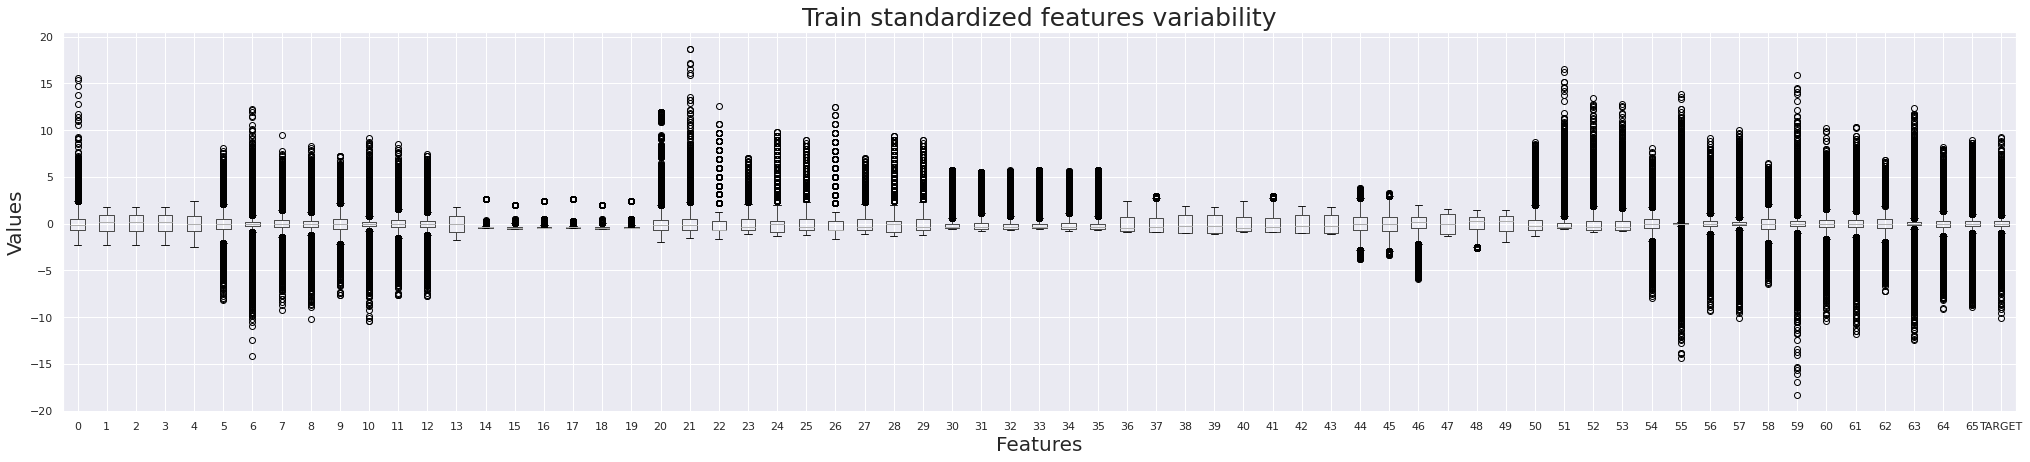

In [31]:
figure, ax = plt.subplots(1, 1, figsize = (35, 7))

train_remove_mean_values = train_remove.mean()
train_remove_std_values = train_remove.std()

train_remove_std = (train_remove-train_remove.mean())/train_remove.std()

train_remove_std.boxplot()
ax.set_xlabel('Features', fontsize=20)
ax.set_ylabel('Values', fontsize=20)
ax.set_title('Train standardized features variability', fontsize=25)

figure.savefig("features_std_dis.png", bbox_inches='tight', dpi=600)

### The devil is in the details, we need to standardize test dataset by using train mean and train standard deviation

In [32]:
test_std = (test-train_remove_mean_values)/train_remove_std_values

## 4.3 Remove Multicollinearity among features

In [34]:
remove_set = set()
threshold = 0.95
for i in range(66):
    for j in range(i+1, 66):
        if i not in remove_set and correlation_df.iloc[i, j] >=threshold:
            remove_set.add(str(j))
remove_set = list(remove_set)


train_std_noncor = train_remove_std.drop(remove_set, axis=1)
test_std_noncor = test_std.drop(remove_set, axis=1)

In [35]:
print(train_std_noncor.shape)
non_cor_names = list(train_std_noncor.columns.values)
# print(non_cor_names)
non_cor_names.remove('TARGET')
print(non_cor_names)

(89320, 60)
['0', '1', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '33', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65']


In [36]:
# ridge regression
# train
reg = Ridge(alpha=0.04)
reg.fit(train_std_noncor.iloc[:, 0:59], train_std_noncor.iloc[:, 59])

pred = reg.predict(train_std_noncor.iloc[:, 0:59])

# test
pred_test = reg.predict(test_std_noncor.iloc[:, 0:59])

train_res = np.sum(train_remove['TARGET'][pred>0])
test_res = np.sum(test['TARGET'][pred_test>0])

print()
print('Ridge regression')
print(f'Maximum sum train return {train_res}, Total train return: {train_max}, Maximum train percentage return: {train_res/train_max*100}%')
print(f'Maximum sum test return {test_res}, Total test return: {test_max}, Maximum test percentage return: {test_res/test_max*100}%')


Ridge regression
Maximum sum train return 24.4603256455, Total train return: 195.6927566509, Maximum train percentage return: 12.499351567281172%
Maximum sum test return 3.7559956681999997, Total test return: 55.96225182400002, Maximum test percentage return: 6.711659280638882%


### After removing high correlation features, model performance improved by using ridge regression

## 5.3 Nonlinear transformation

### Conclusion: support vector machine method doesn't performa well

## 5.5 Autoencoder Resnet model

In [56]:
train_remove_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,TARGET
15569,-1.591570,0.419550,0.409574,0.420952,0.344451,5.268275,-2.638600,0.867947,-0.958219,0.502489,-0.276027,2.705966,1.924548,1.011336,0.296421,0.028303,0.212895,-0.112213,-0.023840,-0.177325,11.163422,4.744509,6.903074,2.952768,8.991375,6.239567,-0.646263,4.263071,3.636834,4.441104,-0.481989,-0.671017,-0.547252,-0.311373,0.116526,-0.375818,2.379025,-0.837720,-0.216616,-0.679874,-0.851833,1.441253,0.989817,1.782174,-0.442508,0.300462,0.861421,0.684658,0.862615,0.855227,6.053265,1.163374,3.210753,2.555351,0.597081,1.156251,3.101378,2.763801,0.000220,1.877375,1.067262,1.468370,0.454987,1.632157,2.922553,2.837309,-10.046572
39228,1.657266,0.419550,0.429479,0.417079,0.616928,-0.238355,-0.066295,0.398381,-0.351540,-0.109290,-0.039896,0.291888,0.187233,1.412469,-0.426931,-0.530180,-0.477976,-0.426767,-0.556078,-0.477765,-0.016130,0.131895,-0.646844,0.006340,-0.483598,-0.053288,0.294614,-0.321377,-0.072252,-0.353769,-0.435937,-0.245459,-0.500976,-0.558643,-0.540297,-0.624276,-0.862643,0.654132,0.111164,0.818974,0.965010,0.528491,0.699632,-0.224033,0.265885,-1.017788,0.448340,1.252381,0.670103,0.576805,-0.035673,-0.541829,-0.365109,-0.633775,1.312632,-0.010459,0.497131,0.078190,-0.438461,0.006160,0.311147,0.217054,0.820794,-0.007006,0.520544,0.142942,-9.546656
63256,4.420895,-0.874390,-0.864394,-0.873736,-0.139562,-1.085084,0.529977,-1.422117,-0.051032,-2.512911,-0.879755,-2.558165,-2.110127,0.139685,2.655177,2.022884,2.465737,-0.112213,-0.236735,-0.177325,0.549805,0.436038,-0.646844,-0.975802,-0.895553,-0.952267,2.176367,1.315925,3.636834,3.242385,2.916167,2.749283,2.867501,-0.275111,-0.054112,-0.339382,-0.849244,-0.929493,-1.037987,-1.088969,1.041170,-0.351585,1.247452,1.485541,-1.979334,-1.862797,0.552265,0.652249,0.385049,0.546543,1.729638,0.092868,1.128907,1.094857,-2.484805,-0.933589,-4.515653,-3.661379,-2.859678,-0.459531,-2.769091,-2.158519,-3.062226,-0.963747,-4.707058,-3.834919,-9.106747
74827,-1.995347,-1.531313,-1.541189,-1.533136,-0.473125,-0.121628,-0.874190,-1.789493,-1.295655,0.880549,-1.454116,-1.161337,-1.467101,0.818498,-0.364031,-0.344019,-0.417900,-0.300946,-0.449630,-0.357589,1.056042,0.699015,0.296893,0.988482,1.164224,2.044331,0.294614,0.497274,-0.484374,-0.653449,-0.514991,-0.218069,-0.580416,0.397065,0.459752,0.336021,2.334043,1.455653,1.286623,0.915443,-0.608926,0.542251,-1.002200,-1.071539,0.751532,0.143673,0.264638,0.355586,-0.172777,-0.069807,1.238364,0.053652,0.684905,0.499513,1.283343,0.106117,0.730878,0.419319,2.151723,0.917287,1.351149,1.647902,1.857436,0.399532,1.097568,0.939363,-8.929755
18477,-0.747015,-0.237373,-0.247316,-0.238324,-0.243295,-3.914652,-1.016323,0.891080,-0.004867,-1.154787,-0.380911,-0.220514,0.044639,1.258196,0.233521,-0.024886,0.152820,-0.080758,-0.289959,-0.147281,9.270608,1.605086,-0.646844,2.625387,8.167465,5.640248,1.235490,0.988465,4.048954,2.643026,-0.218305,-0.405615,-0.282281,-0.440242,-0.628870,-0.505305,-0.839074,-0.628022,1.660188,0.254892,0.679757,-0.805067,0.074232,-0.535480,1.281962,-1.043885,0.638068,1.469045,0.847498,1.118936,4.856749,1.770205,0.944526,1.041571,-1.251713,5.038597,0.616455,2.376650,2.432383,-0.368392,-0.208555,-0.441813,0.040802,4.246476,0.424501,1.831210,-8.914202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61204,1.656962,-0.177653,-0.167693,-0.180926,0.821588,-0.252692,-1.339318,-0.663164,-0.930222,-0.377452,-1.118971,-0.536899,-0.713970,0.579400,-0.426931,-0.583369,-0.477976,-0.426767,-0.502854,-0.477765,-0.358286,-1.410333,-0.646844,-0.648422,-0.483598,-0.352947,-0.646263,1.152195,-0.484374,0.245590,-0.372290,-0.560603,-0.43701

In [80]:
index = 0
train_remove_std = train_remove_std.sort_values(by=['TARGET'])
for i in range(train_remove_std.shape[0]):
    if train_remove_std.iloc[i, 66] < 0 and train_remove_std.iloc[i+1, 66] > 0:
        index = i
        break
samples = train_remove_std.iloc[index-1000:index+1000, :]

In [81]:
input_features = samples.drop(['TARGET'], axis=1).to_numpy()
output_features = pd.DataFrame((np.sign(samples['TARGET'])+1)//2).to_numpy()

X_test = test_std.drop(['TARGET'], axis=1).to_numpy()
Y_test = pd.DataFrame((np.sign(test_std['TARGET'])+1)//2).to_numpy()

X_train, X_val, Y_train, Y_val = train_test_split(input_features, output_features, test_size=0.2, random_state=42)

train_data, val_data = train_test_split(train_remove, test_size=0.2, random_state=42)
test_data = test

auto_train_max = np.sum(train_data['TARGET'][train_data['TARGET']>0])
auto_val_max = np.sum(val_data['TARGET'][val_data['TARGET']>0])
auto_test_max = np.sum(test['TARGET'][test['TARGET']>0])

print('Train X shape:', X_train.shape)
print('Validation X shape:', X_val.shape)
print('Train Y shape:', Y_train.shape)
print('Val Y shape:', Y_val.shape)
print('train_max:', auto_train_max)
print('val_max:', auto_val_max)
print('test_max:', auto_test_max)

Train X shape: (1600, 66)
Validation X shape: (400, 66)
Train Y shape: (1600, 1)
Val Y shape: (400, 1)
train_max: 153.0990565158
val_max: 38.75009866110001
test_max: 55.96225182400002


In [92]:
train_data_all = train_data.drop(['TARGET'], axis=1).to_numpy()
train_data_all_label = pd.DataFrame((np.sign(train_data['TARGET'])+1)//2).to_numpy()
train_data_all.shape

(71456, 66)

In [93]:
train_input = torch.from_numpy(X_train)
train_output = torch.from_numpy(Y_train)
val_input = torch.from_numpy(X_val)
val_output = torch.from_numpy(Y_val)
test_input = torch.from_numpy(X_test)
test_output = torch.from_numpy(Y_test)

train_data_all = torch.from_numpy(train_data_all)
train_data_all_label = torch.from_numpy(train_data_all_label)

train_input = train_input.float()
train_output = train_output.float()
val_input = val_input.float()
val_output = val_output.float()
test_input = test_input.float()
test_output = test_output.float()

train_data_all = train_data_all.float()
train_data_all_label = train_data_all_label.float()

input_feature = train_input.shape[1]
output_feature = 1

# print('input_feature:', input_feature)
# print('output_feature:', output_feature)

In [94]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [95]:
train_input = train_input.to(device)
train_output = train_output.to(device)
val_input = val_input.to(device)
val_output = val_output.to(device)
test_input = test_input.to(device)
test_output = test_output.to(device)

train_data_all = train_data_all.to(device)
train_data_all_label = train_data_all_label.to(device)

In [96]:
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything()

In [97]:
# auto-encoder model
# base model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.linear1 = nn.Linear(input_feature, input_feature//2)
        self.linear2 = nn.Linear(input_feature//2, input_feature//4)
        self.linear3 = nn.Linear(input_feature//4, input_feature//16)
        self.linear4 = nn.Linear(input_feature//16, input_feature//16)
        
        self.linear5 = nn.Linear(input_feature//16, input_feature//16)
        self.linear6 = nn.Linear(input_feature//16+input_feature, input_feature//16)
        
        self.batchnorm_1 = nn.BatchNorm1d(input_feature//2)
        self.batchnorm_2 = nn.BatchNorm1d(input_feature//4)
        self.batchnorm_3 = nn.BatchNorm1d(input_feature//16)
        self.linear = nn.Linear(input_feature//16, 1)
        
        nn.init.constant_(self.linear1.weight, 0.1)
        nn.init.constant_(self.linear2.weight, 0.1)
        nn.init.constant_(self.linear3.weight, 0.1)
        nn.init.constant_(self.linear4.weight, 0.1)
        nn.init.constant_(self.linear.weight, 0.1)
        self.relu = nn.ReLU()
#         self.leakyrelu = nn.LeakyReLU(0.1)
        self.dropout = nn.Dropout(0.15)
        
        self.softmax = nn.Softmax()
        

    def forward(self, x_):
        x = self.linear1(x_)
#         x = self.batchnorm_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.linear2(x)
#         x = self.batchnorm_2(x)
        x = self.relu(x)
#         x = self.dropout(x)
        
        x = self.linear3(x)
#         x = self.batchnorm_3(x)
        x = self.relu(x)
        
        x = self.linear4(x)
        x = self.relu(x)
        
        x = self.linear5(x)
        x = self.relu(x)
        
        x = torch.cat((x, x_), 1)
        x = self.linear6(x)
        x = self.relu(x)
        
        output = self.linear(x)
                
        return output.float()

In [ ]:
# # auto-encoder model
# # base model
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         self.conv1 = nn.Conv2d(1, 16, 2)
#         self.conv2 = nn.Conv2d(16, 32, 2)
#         self.maxpool = nn.MaxPool2d(2)
        
#         self.linear = nn.Linear(128, 1)
        
#         self.linear2 = nn.Linear(input_feature//2, input_feature//4)
#         self.linear3 = nn.Linear(input_feature//4, input_feature//16)
#         self.linear4 = nn.Linear(input_feature//16, input_feature//16)
        
#         self.linear5 = nn.Linear(input_feature//16, input_feature//16)
#         self.linear6 = nn.Linear(input_feature//16+input_feature, input_feature//16)
        
#         self.batchnorm_1 = nn.BatchNorm1d(input_feature//2)
#         self.batchnorm_2 = nn.BatchNorm1d(input_feature//4)
#         self.batchnorm_3 = nn.BatchNorm1d(input_feature//16)
        
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.15)
        
#         self.softmax = nn.Softmax()
        

#     def forward(self, x_):
#         x = self.conv1(x_)
#         x = self.maxpool(x)
#         x = self.conv2(x)
#         x = torch.flatten(x, 1)
#         x = self.relu(x)
#         output = self.linear(x)
#         return output.float()

In [98]:
batch_size = 100000
train_ds = TensorDataset(train_input, train_output)
train_dl = DataLoader(train_ds, batch_size= batch_size, shuffle=False)

In [117]:
%matplotlib inline
def fit(num_epochs, model, loss_fn, train_input, train_output, val_input, val_output, test_input, test_output, model_path):
    best_loss = float('inf')
    train_pred_output = []
    val_pred_output = []
    train_error = []
    val_error = []
    test_error = []
    epochs = []
    
    train_returns = []
    val_returns = []
    test_returns = []
    
    train_sum = []
    val_sum = []
    test_sum = []

    for epoch in range(num_epochs):
        for x,y in train_dl:
            model = model.train()
            opt.zero_grad()
            pred = model(x)
#             loss = loss_fn(pred, y.long().squeeze())
            y = torch.reshape(y, (y.shape[0], 1))
            loss = loss_fn(pred, y)
            loss.backward()
            opt.step()

        if epoch % 500 == 0:
            print(loss)
            model = model.eval()
            
            train_pred = model(train_data_all)
            train_pred_index = torch.argmax(train_pred, dim=1)
            train_output = torch.reshape(train_output, (train_output.shape[0], 1))
#             train_loss = loss_fn(train_output, train_pred)
#             train_loss = loss_fn(train_pred, train_data_all_label.long().squeeze())
            train_loss = loss_fn(train_output, train_pred)
            train_loss = train_loss.cpu().detach().numpy()

            test_pred = model(test_input)
            test_pred_index = torch.argmax(test_pred, dim=1)
            test_output = torch.reshape(test_output, (test_output.shape[0], 1))
#             val_loss = loss_fn(val_output, val_pred)
#             test_loss = loss_fn(test_pred, test_output.long().squeeze())
            test_loss = loss_fn(test_output, test_pred)
            test_loss = test_loss.cpu().detach().numpy()
    
            epochs.append(epoch)
            train_error.append(math.log(train_loss+1))
            test_error.append(math.log(test_loss+1))
            
#             figure, ax = plt.subplots(1, 2, figsize = (20, 7))
#             ax = ax.flatten()
            
#             figure, ax = plt.subplots(1, 4, figsize = (22, 5))
#             ax = ax.flatten()
            
#             plt.grid(False)
#             train_conf = confusion_matrix(train_output, train_pred_index)
#             g1 = sns.heatmap(train_conf, cmap="YlGnBu",cbar=False, ax=ax[0], annot = True)
#             g1.set_ylabel('True Target')
#             g1.set_xlabel('Predict Target')
#             g1.set_title('Train dataset')

#             plt.grid(False)
#             val_conf = confusion_matrix(val_output, val_pred_index)
#             g2 = sns.heatmap(val_conf, cmap="YlGnBu",cbar=False, ax=ax[1], annot = True)
#             g2.set_ylabel('True Target')
#             g2.set_xlabel('Predict Target')
#             g2.set_title('Val dataset')
            
#             plt.grid(False)
#             test_conf = confusion_matrix(test_output, test_pred_index)
#             g3 = sns.heatmap(test_conf, cmap="YlGnBu",cbar=False, ax=ax[2], annot = True)
#             g3.set_ylabel('True Target')
#             g3.set_xlabel('Predict Target')
#             g3.set_title('Test dataset')
            
            train_pred_np = train_pred_index.cpu().detach().numpy()
            train_output_np = train_output.cpu().detach().numpy()
            test_pred_np = test_pred_index.cpu().detach().numpy()
            test_output_np = test_output.cpu().detach().numpy()
            
#             train_max_value = max(max(train_output_np), max(train_pred_np))
#             train_min_value = min(min(train_output_np), min(train_pred_np))
#             val_max_value = max(max(val_output_np), max(val_pred_np))
#             val_min_value = min(min(val_output_np), min(val_pred_np))
#             test_max_value = max(max(test_output_np), max(test_pred_np))
#             test_min_value = min(min(test_output_np), min(test_pred_np))
            
#             ax[0].scatter(train_output_np, train_pred_np, s = 20, alpha=0.3, c='blue')
#             ax[1].scatter(val_output_np, val_pred_np, s = 20, alpha=0.3, c='red')
#             ax[2].scatter(test_output_np, test_pred_np, s = 20, alpha=0.3, c='green')
            
#             ax[0].plot(epochs, train_error, c='blue')
#             ax[0].plot(epochs, val_error, c='red')
#             ax[0].plot(epochs, test_error, c='green')
#             ax[0].set_title('Errors vs Epochs', fontsize=15)
#             ax[0].set_xlabel('Epoch', fontsize=10)
#             ax[0].set_ylabel('Errors', fontsize=10)

#             ax[0].legend(['train', 'valid', 'test'])
            
#             ax[0].set_xlim([train_min_value, train_max_value])
#             ax[0].set_ylim([train_min_value, train_max_value])
#             ax[0].set_title('Trainig data', fontsize=15)
#             ax[0].set_xlabel('Target', fontsize=10)
#             ax[0].set_ylabel('Prediction', fontsize=10)
#             ax[0].plot([train_min_value, train_max_value], [train_min_value, train_max_value], 'k-')
            
#             ax[1].set_xlim([val_min_value, val_max_value])
#             ax[1].set_ylim([val_min_value, val_max_value])
#             ax[1].set_title('Validation data', fontsize=15)
#             ax[1].set_xlabel('Target', fontsize=10)
#             ax[1].set_ylabel('Prediction', fontsize=10)
#             ax[1].plot([val_min_value, val_max_value], [val_min_value, val_max_value], 'k-')
            
#             ax[2].set_xlim([test_min_value, test_max_value])
#             ax[2].set_ylim([test_min_value, test_max_value])
#             ax[2].set_title('Testing data', fontsize=15)
#             ax[2].set_xlabel('Target', fontsize=10)
#             ax[2].set_ylabel('Prediction', fontsize=10)
#             ax[2].plot([test_min_value, test_max_value], [test_min_value, test_max_value], 'k-')
            
#             ax[3].plot(epochs, train_error, c='blue')
#             ax[3].plot(epochs, val_error, c='red')
#             ax[3].plot(epochs, test_error, c='green')
#             ax[3].set_title('Training and Validation error', fontsize=15)
#             ax[3].set_xlabel('Epochs', fontsize=10)
#             ax[3].set_ylabel('MSE error', fontsize=10)
            
#             display.clear_output(wait=True)
#             display.display(pl.gcf())
            
#             print('Epoch ', epoch, 'Train_loss: ', train_loss*1000, ' Validation_loss: ', val_loss*100, ' Test_loss: ', test_loss*100)
            
            train_res = np.sum(train_data['TARGET'][train_pred_np>0])
            test_res = np.sum(test_data['TARGET'][test_pred_np>0])
            
#             train_returns.append(train_res)
#             val_returns.append(val_res)
#             test_returns.append(test_res)
            
#             ax[1].plot(epochs, train_returns, c='blu`e')
#             ax[1].plot(epochs, val_returns, c='red')
#             ax[1].plot(epochs, test_returns, c='green')
#             ax[1].legend(['train', 'valid', 'test'])
#             ax[1].set_title('Return vs Epochs', fontsize=15)
#             ax[1].set_xlabel('Epoch', fontsize=10)
#             ax[1].set_ylabel('Returns', fontsize=10)

#             display.clear_output(wait=True)
#             display.display(pl.gcf())
            
            train_sum.append(train_res)
            test_sum.append(test_res)
            
#             print(f'Maximum sum train return {train_res}, Total train return: {auto_train_max}, Maximum train percentage return: {train_res/auto_train_max*100}%')
#             print(f'Maximum sum train return {val_res}, Total train return: {auto_val_max}, Maximum train percentage return: {val_res/auto_val_max*100}%')
#             print(f'Maximum sum test return {test_res}, Total test return: {auto_test_max}, Maximum test percentage return: {test_res/auto_test_max*100}%')
#             print('Epoch:', epoch, 'Train loss:', train_loss, 'Val loss:', val_loss, 'Test loss:', test_loss)
            print(f'Epoch: {epoch}, Train loss: {train_loss}, Train return: {train_res/auto_train_max*100}%, Test loss: {test_loss}, Test return: {test_res/auto_test_max*100}%')
        
                
#             train_pred_output.append([train_pred.cpu().detach().numpy(), train_output.cpu().detach().numpy()])
#             val_pred_output.append([val_pred.cpu().detach().numpy(), val_output.cpu().detach().numpy()])
    return train_sum, test_sum


In [119]:
num_epochs = 20000
learning_rate = 0.01
loss_fn = F.mse_loss
# loss_fn = nn.CrossEntropyLoss()

seed_everything()

model = Autoencoder()
model = model.to(device)
opt = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
train_sum_1, test_sum_1 = fit(num_epochs, model, loss_fn, train_input, train_output, val_input, val_output, test_input, test_output, 'model_path_1')
# fig.savefig("auto_encoder.png", bbox_inches='tight', dpi=600)

tensor(0.6932, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 0, Train loss: 39.5519905090332, Train return: 0.0%, Test loss: 0.6932872533798218, Test return: 0.0%
tensor(0.6797, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 500, Train loss: 109093.453125, Train return: 0.02719656407268776%, Test loss: 0.7063970565795898, Test return: -3.820809460142211%
tensor(0.6582, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 1000, Train loss: 121394.328125, Train return: -0.23326950154205786%, Test loss: 0.7485681176185608, Test return: -2.7636133493411927%
tensor(0.6428, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 1500, Train loss: 112280.109375, Train return: -0.7889288474324135%, Test loss: 0.787286639213562, Test return: -4.019260811866385%
tensor(0.6243, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch: 2000, Train loss: 211319.4375, Train return: -0.29901121843475%, Test loss: 0.8352581858634949, Test return: -4.110985998625195%
tensor(0.6113, device='cuda:0', grad_fn=

In [ ]:
# model = Autoencoder_model()
# model.load_state_dict(torch.load(model_path))
# model.eval()